### Calculating a Composite

What is a composite?  mean of a field conditioned on the value of another field.

_Example:_

We have heard that ENSO changes atmospheric circulation and impacts precipitation and temperature globally.  We can explore this using composites. 

_Specific statement of the problem:_ 

What are the precipitation anomalies during El Nino vs. Neutral vs. La Nina and how are they different?

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

#### ENSO

We have an index called Nino3.4 that quantifies ENSO.  When it is large and positive, we say there is an El Nino.  When it is large and negative, we say there is a La Nina.  In between, we say it is neutral.

Nino3.4 is calculated at the SST anomalies in a particular region in the Tropical Pacific.  We calculated this previously using the NOAA OISST data and then Subsetting, Groupby, and Aggregating. I wrote this data to a file:

`/scratch/kpegion/nino34_1982-2019.oisstv2_anoms.nc`

In [2]:
file_nino34='/scratch/kpegion/nino34_1982-2019.oisstv2_anoms.nc'
ds_nino34=xr.open_dataset(file_nino34)
ds_nino34

<xarray.Dataset>
Dimensions:  (time: 456)
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
    month    (time) int64 ...
Data variables:
    sst      (time) float32 ...

This data goes from 1982-2019

We can plot it as a timeseries

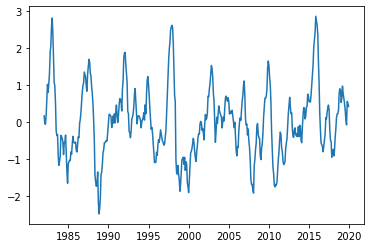

In [3]:
plt.plot(ds_nino34['time'],ds_nino34['sst'])

### Defining El Nino, La Nina, and Neutral

Nino3.4 >= 1 -> El Nino

Nino3.4 <= -1 -> La Nina

Nino3.4 > -1 and Nino3.4 < 1 -> Neutral

In [4]:
elnino=ds_nino34['sst'].where(ds_nino34['sst']>=1)
lanina=ds_nino34['sst'].where(ds_nino34['sst']<=-1)
neutral=ds_nino34['sst'].where(np.logical_and(ds_nino34['sst']>-1,
                                              ds_nino34['sst']<1))

#### How many months do we have with El Nino, La Nina, and Neutral?

In [14]:
print('El Nino: ',elnino.count(dim='time').values)
print('Neutral: ',neutral.count(dim='time').values)
print('La Nina: ',lanina.count(dim='time').values)

counts=[elnino.count(dim='time').values,
        lanina.count(dim='time').values,
        neutral.count(dim='time').values]
print(counts)

El Nino:  61
Neutral:  330
La Nina:  65
[array(61), array(65), array(330)]


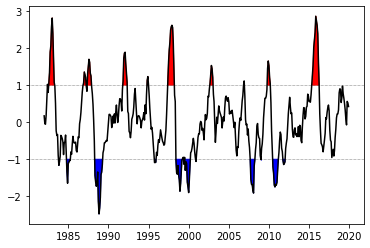

In [6]:
plt.plot(ds_nino34['time'],ds_nino34['sst'],'k')
plt.fill_between(ds_nino34['time'],1,elnino,color='red')
plt.fill_between(ds_nino34['time'],lanina, -1,color='blue')
plt.axhline(1,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-1,color='black',linewidth=0.5,linestyle='dotted')

### Precipitation Data

We will use the Global Precipitation Climatology Project (GPCP) Monthly Precipitation Data located in:

`/shared/obs/gridded/GPCP/monthly/precip.mon.mean.nc`

In [7]:
file='/shared/obs/gridded/GPCP/monthly/precip.mon.mean.nc'
ds_precip=xr.open_dataset(file)
ds_precip

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 496)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-04-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] ...
    lat_bnds   (lat, nv) float32 ...
    lon_bnds   (lon, nv) float32 ...
    precip     (time, lat, lon) float32 ...
Attributes:
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    documentation:         http://www.esrl.noaa.gov/psd/data/gridded/data.gpc...
    version:               V2.3
    Acknowledgement:       \n
    contributor_name:      Robert Adler    University of Maryland \nGeorge Hu...
    dataset_title:         Global Precipitation Climatology Project (GPCP) Mo...
    description:           https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2020/03 through latest.

This data goes from 1979-2020.  Let's select the same times as the nino34 data.

In [8]:
ds_precip=ds_precip.sel(time=slice(ds_nino34['time'][0],ds_nino34['time'][-1]))
ds_precip

<xarray.Dataset>
Dimensions:    (lat: 72, lon: 144, nv: 2, time: 456)
Coordinates:
  * lat        (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon        (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time       (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) datetime64[ns] 1982-01-01 1982-02-01 ... 2020-01-01
    lat_bnds   (lat, nv) float32 -90.0 -87.5 -87.5 -85.0 ... 85.0 87.5 87.5 90.0
    lon_bnds   (lon, nv) float32 0.0 2.5 2.5 5.0 5.0 ... 355.0 357.5 357.5 360.0
    precip     (time, lat, lon) float32 ...
Attributes:
    Conventions:           CF-1.0
    curator:               Dr. Jian-Jian Wang\nESSIC, University of Maryland ...
    citation:              Adler, R.F., G.J. Huffman, A. Chang, R. Ferraro, P...
    title:                 GPCP Version 2.3 Combined Precipitation Dataset (F...
    platform:              NOAA POES (Polar Orbiting Environmental Satellites)
    source_obs:            CDR RSS SSMI/SSMIS Tbs over ocean \nCDR SSMI/SSMIS...
    documentation:         http://www.esrl.noaa.gov/psd/data/gridded/data.gpc...
    version:               V2.3
    Acknowledgement:       \n
    contributor_name:      Robert Adler    University of Maryland \nGeorge Hu...
    dataset_title:         Global Precipitation Climatology Project (GPCP) Mo...
    description:           https://data.nodc.noaa.gov/cgi-bin/iso?id=gov.noaa...
    source:                https://www.ncei.noaa.gov/data/global-precipitatio...
    source_documentation:  https://www.ncdc.noaa.gov/cdr/atmospheric/precipit...
    NCO:                   4.6.9
    history:               Generated at NOAA/ESRL PSD Sep 9 2016 based on dat...
    References:            http://www.psl.noaa.gov/data/gridded/data.gpcp.html
    data_comment:          Interim data covers 2020/03 through latest.

### We need to make anomalies of our precipitation

In [9]:
ds_climo=ds_precip.groupby('time.month').mean()
ds_anoms=ds_precip.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2, time: 456)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
  * time      (time) datetime64[ns] 1982-01-01 1982-02-01 ... 2019-12-01
    month     (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (time, lat, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    lon_bnds  (time, lon, nv) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    precip    (time, lat, lon) float32 0.011493059 0.029161826 ... -0.22516938

### Now we can select the dates that match El Nino, La Nina, and Neutral

In [57]:
elnino_precip=ds_anoms.sel(time=elnino.dropna(dim='time')['time']).mean(dim='time')
lanina_precip=ds_anoms.sel(time=lanina.dropna(dim='time')['time']).mean(dim='time')
neutral_precip=ds_anoms.sel(time=neutral.dropna(dim='time')['time']).mean(dim='time')

comp_precip=[elnino_precip,lanina_precip,neutral_precip]
print(comp_precip)

[<xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    lon_bnds  (lon, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    precip    (lat, lon) float32 -0.02095638 -0.025663253 ... -0.025592996, <xarray.Dataset>
Dimensions:   (lat: 72, lon: 144, nv: 2)
Coordinates:
  * lat       (lat) float32 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon       (lon) float32 1.25 3.75 6.25 8.75 ... 351.25 353.75 356.25 358.75
Dimensions without coordinates: nv
Data variables:
    lat_bnds  (lat, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    lon_bnds  (lon, nv) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    precip    (lat, lon) float32 0.03458638

/homes/kpegion/.conda/envs/clim680/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:782: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_xticks(xticks, minor)
/homes/kpegion/.conda/envs/clim680/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:829: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  return super(GeoAxes, self).set_yticks(yticks, minor)


Text(0.5, 0.98, 'Composite Precipitation Anomalies during ENSO')

/homes/kpegion/.conda/envs/clim680/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


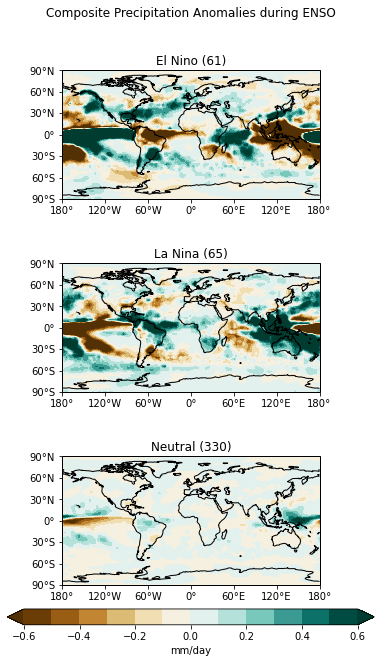

In [43]:
labels=['El Nino','La Nina', 'Neutral']
clevs=np.arange(-0.6,0.7,0.1)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs=axs.flatten()

#Loop over all of the seasons and plot
for i,enso in enumerate(comp_precip):

        # Select the season
        data=comp_precip[i]['precip']

        # Add the cyclic point
        data,lons=add_cyclic_point(data,coord=comp_precip[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_precip[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')

       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='mm/day')

# Add a big title at the top
plt.suptitle('Composite Precipitation Anomalies during ENSO')

#### Checking and understanding out Composites
 
Pick some points and make a scatter plot with the Nino34 index

* High Composite Value (EQ, 120W)
* Medium Composite Value (30N,90W)
* Low Composite Value (40N,90W)

__High Composite__

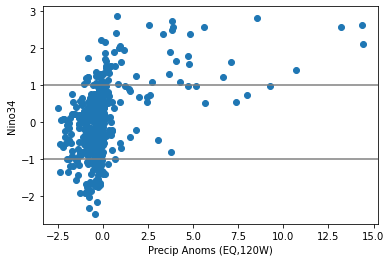

In [54]:
pt=ds_anoms.sel(lat=0,lon=360-120,method='nearest')
plt.scatter(pt['precip'],ds_nino34['sst'])
plt.xlabel('Precip Anoms (EQ,120W)')
plt.ylabel('Nino34')

plt.axhline(1,color='gray')
plt.axhline(-1,color='gray')

In this case, the data are not linearly related, but the composite identifies that high values of Nino34 are associated with high values of Precip Anomalies in this region.  

Composite does not make any assumptions about how our two datasets are related. 

__Medium Composite__

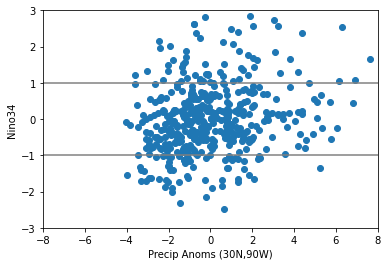

In [55]:
pt=ds_anoms.sel(lat=30,lon=360-90,method='nearest')
plt.scatter(pt['precip'],ds_nino34['sst'])
plt.xlim([-8,8])
plt.ylim([-3,3])
plt.xlabel('Precip Anoms (30N,90W)')
plt.ylabel('Nino34')

plt.axhline(1,color='gray')
plt.axhline(-1,color='gray')

__Low Composite__

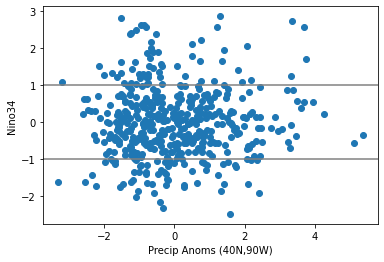

In [56]:
pt=ds_anoms.sel(lat=40,lon=360-90,method='nearest')
plt.scatter(pt['precip'],ds_nino34['sst'])
plt.xlabel('Precip Anoms (40N,90W)')
plt.ylabel('Nino34')

plt.axhline(1,color='gray')
plt.axhline(-1,color='gray')

### Interpreting a composite

* Write down in words what question a composite can answer.
* Why should I be careful about comparing El Nino or La Nina with Neutral?
* How could I made this comparison better?
* In what situation might a composite be misleading?

### Summary & Key Points

* A composite is mean made based on a certain condition.
* There is variability we are not considering in a composite.
* A composite does not make any assumptions about how our two datasets are related
* We can make composites using the `xr.where` function.
* We need to be aware of outliers, variability, and sample size when making composites